Create various data visualizations that help you better understand the data you are working with (exploratory data analysis) and help others understand trends in the data (explanatory data analysis).


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
filename = '/content/drive/MyDrive/PTDataScience/Project/SalesPredictionCLEAN.xlsx'
df = pd.read_excel(filename)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Flagged_Item_Weight,Flagged_Outlet_Size
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,0,1
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,0


In [17]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Flagged_Item_Weight            int64
Flagged_Outlet_Size            int64
dtype: object

#Exploratory

Somethings I am curious about


*   Which store produces the most (Outlet ID/ sum Item Outlet Sales)
*   Items that sell the most (Item ID / Item Outlet Sales)
*  How does Item Visibility effect sales (Item Vis/ IO Sales)
*   Are we better off making more S, M, Or H stores (Outlet size / Sum Item Outlet Sales)
*   Does Fat content matter in as years progress -Don't have different years data
*  What item costs the most to ship Weight/ Sale price
* Are there any weird outliers that I need to take care of??????



In [26]:
# Can conveuniqueYearsrt to NumPy array or list
OutletSales = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()
OutletSales

Outlet_Identifier
OUT010    1.883402e+05
OUT013    2.142664e+06
OUT017    2.167465e+06
OUT018    1.851823e+06
OUT019    1.795736e+05
OUT027    3.444468e+06
OUT035    2.268123e+06
OUT045    2.036725e+06
OUT046    2.118395e+06
OUT049    2.183970e+06
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
Outlet_Identifier = np.array(OutletSales.index)
Outlet_Identifier

ItemSalesSum = np.array(OutletSales.values)
ItemSalesSum

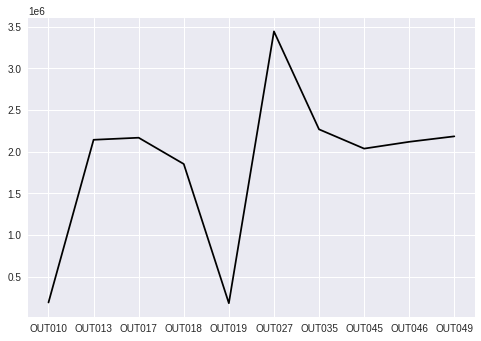

In [27]:
plt.style.use('seaborn')
plt.plot(Outlet_Identifier, ItemSalesSum, c= 'k') 
#OUT010 and OUT019 have something wrong with them or are really under performing. 

In [28]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Flagged_Item_Weight,Flagged_Outlet_Size
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,0,1
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,0


In [30]:
ItemSales = df.groupby('Item_Identifier')['Item_Outlet_Sales'].sum()

In [31]:
Item_Identifier = np.array(ItemSales.index)
Item_Identifier

ISalesSum = np.array(ItemSales.values)
ISalesSum

array([11061.6012, 15723.5328, 20915.4412, ..., 19199.0088, 15073.712 ,
       22743.728 ])

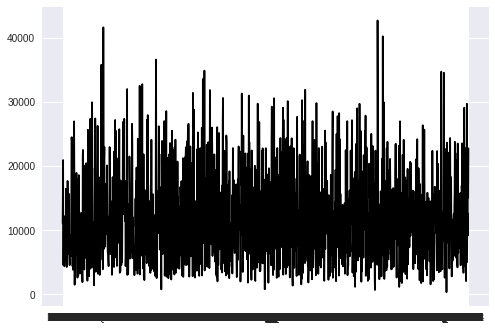

In [32]:
plt.style.use('seaborn')
plt.plot(Item_Identifier, ISalesSum, c= 'k') 
#that's a lot of noise. Lets come back.
#maybe filter by over 30000 under 5000

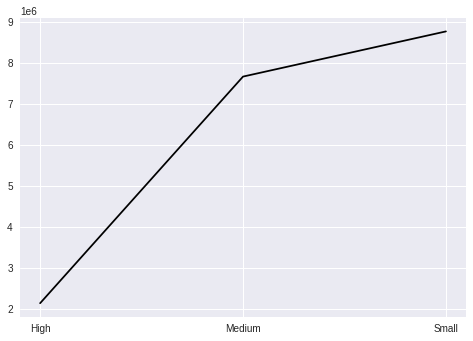

In [33]:
SizeSales = df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum()

OSize = np.array(SizeSales.index)
OSalesSum = np.array(SizeSales.values)
plt.style.use('seaborn')
plt.plot(OSize, OSalesSum, c= 'k')
#great that makes the out010 decision make more sense
#looks like High Outlets don't sell well
#However, 010 didn't sell well either...

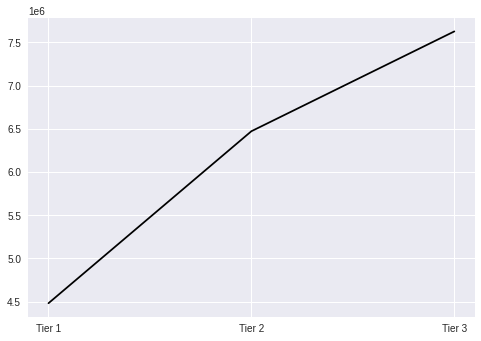

In [36]:
LocSales = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()

Loc = np.array(LocSales.index)
LSalesSum = np.array(LocSales.values)
plt.style.use('seaborn')
plt.plot(Loc, LSalesSum, c= 'k')

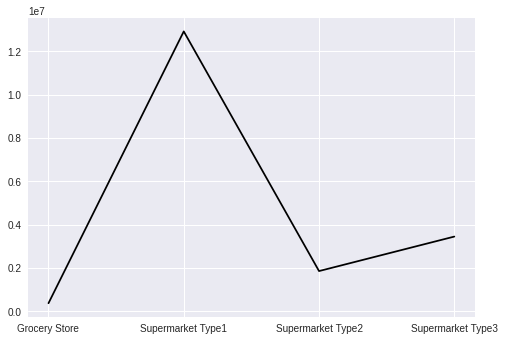

In [39]:
#df.head()

OTSales = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()

OTypes = np.array(OTSales.index)
OTSalesSum = np.array(OTSales.values)
plt.style.use('seaborn')
plt.plot(OTypes, OTSalesSum, c= 'k')
#looks like SM T1 is carrying the bulk of sales


There are a bunch of interesting questions I want to ask, but in the interest of time I need to hone in. So now I am going to see what kind of products sale the best. Then what kind of products are being sold in SM T1 and see if the trend matches. If so, then I will make these graphs more visually applealing and use in the explanatory sections for a recommendation for the company. If not then I will break the SM T1s up in outlets and see if there is a store that is carrying the sales and see if their products match the trend. I'm going with the types of products because horzontally it works well to interpret on the graphs and also because I feel like it is the most immediatly impactful change the company can make to increase sales in other stores. Its difficult to change location or building type 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

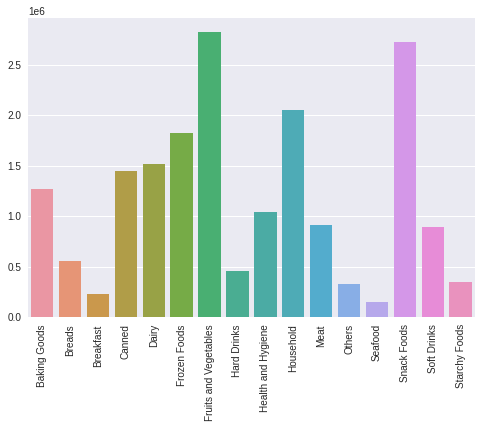

In [57]:
#df.head()

ITSales = df.groupby('Item_Type')['Item_Outlet_Sales'].sum()

ITypes = np.array(ITSales.index)
ITSalesSum = np.array(ITSales.values)

sns.barplot(x = ITypes, y = ITSalesSum)
plt.xticks(rotation = 90) 
#nasty looking labels but I can see that 
#Snack foods, HouseHold, and Fruits and Veggies do the best

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

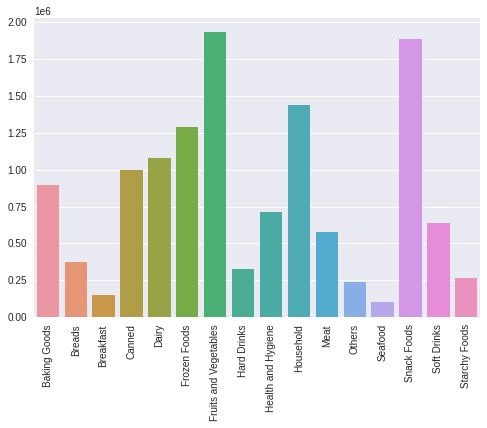

In [59]:
#df.head()
SMT1_Filter = df['Outlet_Type'] == 'Supermarket Type1' 
T1ITSales = df[SMT1_Filter].groupby('Item_Type')['Item_Outlet_Sales'].sum()

T1ITypes = np.array(T1ITSales.index)
T1ITSalesSum = np.array(T1ITSales.values)

sns.barplot(x = T1ITypes, y = T1ITSalesSum)
plt.xticks(rotation = 90) 

#Snack foods, HouseHold, and Fruits and Veggies do the best
#So it matches, neat, but so what... theres not even a remarkable undersale of anything
#Also it might just be that they have a ton of produce, so of course it makes up
#the majority of the sales

Ok, strach the last plan. We are going look at the low sales Grocery Stores and then compare the three graphs and hopfully there is a glaring difference we can see.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

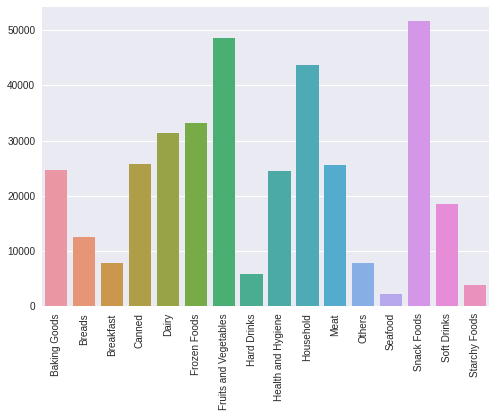

In [61]:
#df.head()

GS_Filter = df['Outlet_Type'] == 'Grocery Store' 
GSSales = df[GS_Filter].groupby('Item_Type')['Item_Outlet_Sales'].sum()

GSTypes = np.array(GSSales.index)
GSSalesSum = np.array(GSSales.values)

sns.barplot(x = GSTypes, y = GSSalesSum)
plt.xticks(rotation = 90)

#Explanatory

Ok, so these don't have titles, and the labels are really long. But let’s imagine I'm presenting this. I would say something like, " Top left is the Overall Sales per Category, Top right is sum of the Grocery stores Sales by Category, Bottom left is our highest selling Outlet category’s (Super Market Tier 1) Sales by Item Category. As we can see Super Market Tier 1 looks like a more like the company's overall sales (duh, it is contributing a lot of the data that feeds into the company's) and that might mean that we should push less meat and hygiene products at the grocery store as they comparatively seem to be more prominent in the Grocery store sales. - Honestly seems like a weird recommendation maybe the demographics are just different at these different types of stores. Why lower inventory when its selling... This seems like a fallacy. A better way to approach this would be comparing count of items / sale If was going to recommend anything about the inventory. 


Or maybe let’s just wipe out Seafood from our Stores. They contribute very little from our largest selling outlet to our smallest and I bet they weigh a ton to ship in (I should have followed that Weight/ Sale line FML)


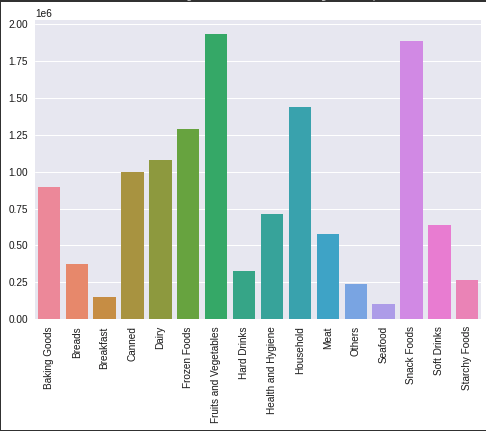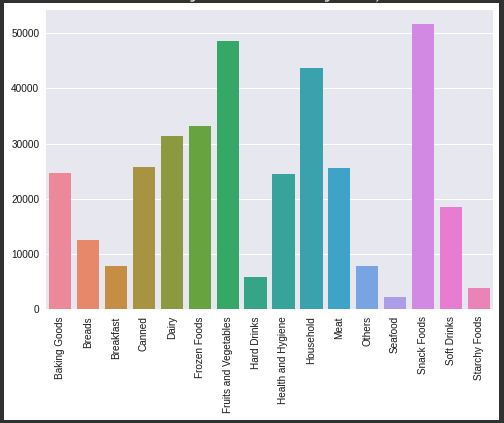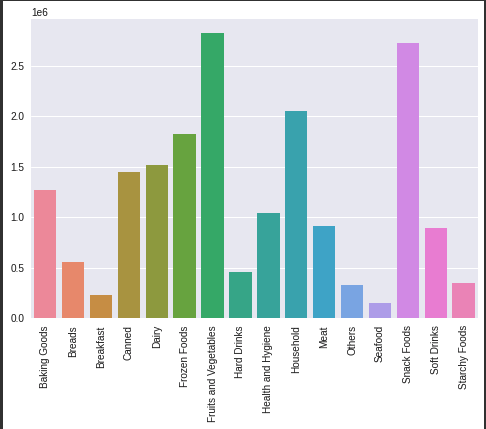